In [1]:
import os
import scanpy as sc

home = '/home/kojo/Code/temporary-trvae-clone'
os.chdir(home)

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import reptrvae

Using TensorFlow backend.


In [3]:
adata = sc.read('./data/alzPho_count.h5ad')
adata

AnnData object with n_obs × n_vars = 96 × 485
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Type'

In [4]:
adata.obs['Group'].value_counts()

HET    48
WT     48
Name: Group, dtype: int64

In [5]:
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
#sc.pp.highly_variable_genes(adata, n_top_genes=500)

In [252]:
#adata = adata[:, adata.var['highly_variable']]

In [6]:
adata

AnnData object with n_obs × n_vars = 96 × 485
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Type', 'n_counts'
    uns: 'log1p'

In [7]:
adata.X.min(), adata.X.max()

(0.0, 19.962364)

In [8]:
adata.obs['Timepoint'].value_counts()

3m    32
6m    32
9m    32
Name: Timepoint, dtype: int64

In [9]:
os.makedirs("./data/", exist_ok=True)

In [10]:
adata.write_h5ad("./data/alzPho_normalized.h5ad")

In [11]:
special_cell_type = "3m"

In [12]:
cell_type_adata = adata[adata.obs["Timepoint"] == special_cell_type]

In [13]:
cell_type_adata.obs['Type'].value_counts()

Pho    16
Pro    16
Name: Type, dtype: int64

In [14]:
cell_type_adata.obs['Type'].cat.categories

Index(['Pho', 'Pro'], dtype='object')

In [15]:
sc.tl.rank_genes_groups(cell_type_adata, groups=['Pho'], groupby="Type", reference='Pro', n_genes=10)

Trying to set attribute `._uns` of view, copying.


In [16]:
top_genes = cell_type_adata.uns['rank_genes_groups']['names']['Pho']
top_genes

array(['O54774|AP3D1', 'Q5DTL9|S4A10', 'Q8BGD9|IF4B', 'O35927|CTND2',
       'O88485|DC1I1', 'P14873|MAP1B', 'Q8BNW9|KBTBB', 'Q62261|SPTB2',
       'Q8R1B4|EIF3C', 'Q8C8R3|ANK2'], dtype=object)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


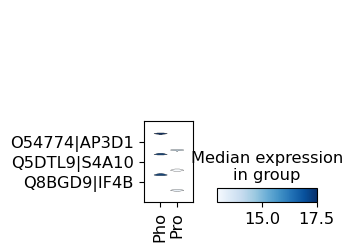

In [17]:
sc.pl.stacked_violin(cell_type_adata, groupby='Type', var_names=top_genes[:3], swap_axes=True)

## Viewing Results

In [18]:
import os
import scanpy as sc

home = '/home/kojo/Code/temporary-trvae-clone'
os.chdir(home)

In [19]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from scipy import sparse
from scipy import stats
from matplotlib import pyplot as plt
import reptrvae

In [20]:
sc.set_figure_params(dpi=200)

In [21]:
path_to_save = "./results/alzPho/"
sc.settings.figdir = path_to_save

In [22]:
specific_cell_type = "3m"

In [23]:
cell_type_key = "Timepoint"
condition_key = "Type"
target_condition = "Pho"
conditions = ['Pro', 'Pho']

In [24]:
adata = sc.read("./data/alzPho_normalized.h5ad")
adata

AnnData object with n_obs × n_vars = 96 × 485
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Type', 'n_counts'

In [25]:
adata = adata[adata.obs[condition_key].isin(conditions)]

In [26]:
cell_type_adata = adata[adata.obs[cell_type_key] == specific_cell_type]
cell_type_adata

View of AnnData object with n_obs × n_vars = 32 × 485
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Type', 'n_counts'

In [27]:
ctrl_adata = cell_type_adata[cell_type_adata.obs[condition_key] == 'Pro']
real_adata = cell_type_adata[cell_type_adata.obs[condition_key] == target_condition]

In [28]:
ctrl_adata.obs['method'] = 'Pro'
real_adata.obs['method'] = target_condition

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


In [29]:
trvae_reconstructed = sc.read(f"./data/reconstructed/trVAE_alzPho/{specific_cell_type}.h5ad")
trvae_reconstructed

AnnData object with n_obs × n_vars = 32 × 485
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Type', 'n_counts', 'batch'

In [30]:
trvae_pred = trvae_reconstructed[trvae_reconstructed.obs[condition_key] == f"Pro_to_{target_condition}"]
trvae_pred.var = ctrl_adata.var
trvae_pred.obs['method'] = 'trVAE'

In [31]:
models = ctrl_adata.concatenate(real_adata, trvae_pred)
models.obs['method'].unique()

array(['Pro', 'Pho', 'trVAE'], dtype=object)

In [32]:
models.var_names

Index(['A2A699|F1712', 'A2AJI0|MA7D1', 'A2ALS5|RPGP1', 'B1AZP2|DLGP4',
       'B9EKR1|PRPTZ', 'D3YVF0|AKAP5', 'D3YXK2|SAFB1', 'D3YZU1|SHAN1',
       'D3Z7P3|GLSK', 'E9PUL5|PRRT2',
       ...
       'Q9Z0R4|ITSN1', 'Q9Z140|CPNE6', 'Q9Z1B3|PLCB1', 'Q9Z1X4|ILF3',
       'Q9Z1Z0|USO1', 'Q9Z204|HNRPC', 'Q9Z2D6|MECP2', 'Q9Z2H5|E41L1',
       'Q9Z2I9|SUCB1', 'Q9Z2Q6|SEPT5'],
      dtype='object', name='Accession', length=485)

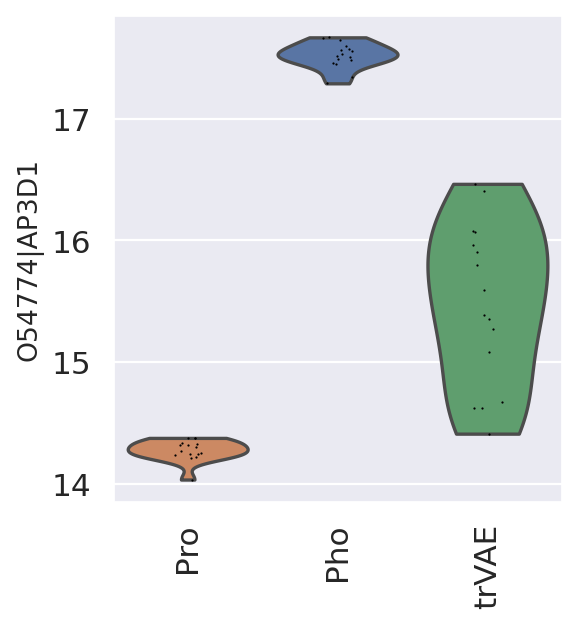

In [44]:
font = {'family' : 'Arial',
        'size'   : 30}

sc.set_figure_params(fontsize=25)
sns.set()
matplotlib.rc('ytick', labelsize=14)
matplotlib.rc('xtick', labelsize=14)
sc.pl.violin(models, 
             keys="O54774|AP3D1", 
             groupby="method", 
             rotation=90,
             show=True,
             order=models.obs["method"].unique().tolist(),
             color = "#ee0ef0",
             save="_model_cmpr.pdf",
             jitter=True,
            )
os.rename(src=os.path.join(path_to_save, "violin_model_cmpr.pdf"), 
          dst=os.path.join(path_to_save, "violin_model_comparison.pdf"))

### R^2 Plots

In [34]:
adata_pred = ctrl_adata.concatenate(real_adata, trvae_pred)
adata_pred

AnnData object with n_obs × n_vars = 48 × 485
    obs: 'Qi ID', 'sex', 'Group', 'Timepoint', 'Type', 'n_counts', 'method', 'batch'

In [35]:
sc.tl.rank_genes_groups(cell_type_adata, reference='Pro', 
                       groupby=condition_key, groups=[target_condition],
                       key_added='up_reg_genes', n_genes=50)
sc.tl.rank_genes_groups(cell_type_adata, reference=target_condition,
                         groupby=condition_key, groups=['Pro'],
                         key_added='down_reg_genes', n_genes=50)
up_genes = cell_type_adata.uns['up_reg_genes']['names'][target_condition]
down_genes = cell_type_adata.uns['down_reg_genes']['names']['Pro']

Trying to set attribute `._uns` of view, copying.


In [36]:
top_genes = up_genes.tolist() + down_genes.tolist()

In [37]:
len(top_genes)

100

reg_mean_top100: 0.02044618922853368
reg_mean_all: 0.13022612094563227


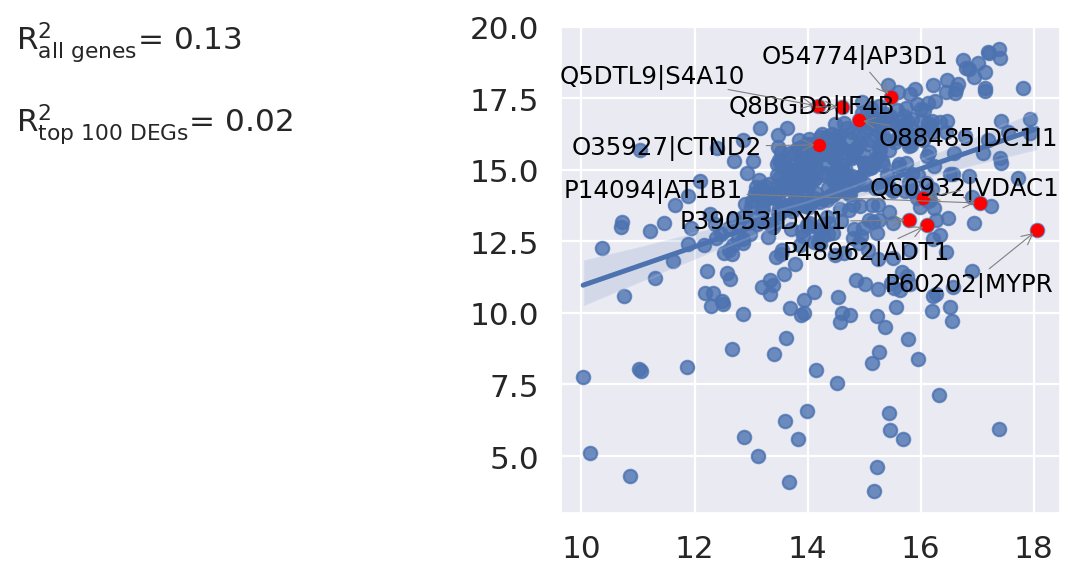

In [38]:
reptrvae.pl.reg_mean_plot(adata_pred,
                         top_100_genes=top_genes,
                         gene_list=top_genes[:5] + top_genes[50:55],
                         condition_key=condition_key,
                         axis_keys={'x': f"Pro_to_{target_condition}", 'y': target_condition},
                         labels={'x': "", 'y': ""},
                         path_to_save=os.path.join(path_to_save, f"trVAE_{specific_cell_type}_reg_mean.pdf"),
                         legend=False,
                         show=True,
                         x_coeff=1.0,
                         y_coeff=0.0)

reg_var_top100: 0.1158533982974538
reg_var_all: 0.18020416958620813


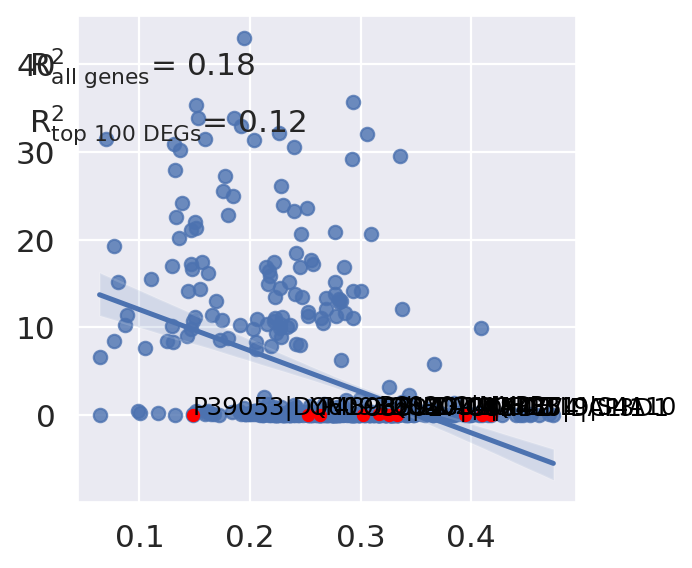

In [39]:
reptrvae.pl.reg_var_plot(adata_pred,
                         top_100_genes=top_genes,
                         gene_list=top_genes[:5] + top_genes[50:55],
                         condition_key=condition_key,
                         axis_keys={'x': f"Pro_to_{target_condition}", 'y': target_condition},
                         labels={'x': "", 'y': ""},
                         path_to_save=os.path.join(path_to_save, f"trVAE_{specific_cell_type}_reg_var.pdf"),
                         legend=False,
                         show=True,
                         x_coeff=1.0,
                         y_coeff=0.1)

In [40]:
up_genes.tolist()

['O54774|AP3D1',
 'Q5DTL9|S4A10',
 'Q8BGD9|IF4B',
 'O35927|CTND2',
 'O88485|DC1I1',
 'P14873|MAP1B',
 'Q8BNW9|KBTBB',
 'Q62261|SPTB2',
 'Q8R1B4|EIF3C',
 'Q8C8R3|ANK2',
 'P10637|TAU',
 'P13595|NCAM1',
 'Q99L43|CDS2',
 'Q8VD37|SGIP1',
 'Q7TMY8|HUWE1',
 'Q6ZPJ3|UBE2O',
 'Q9QYR6|MAP1A',
 'Q8BL65|ABLM2',
 'P35564|CALX',
 'Q62048|PEA15',
 'Q80WJ7|LYRIC',
 'Q9EPN1|NBEA',
 'Q9CWE0|MFR1L',
 'Q9QWI6|SRCN1',
 'P53986|MOT1',
 'P33173|KIF1A',
 'Q8R1Q8|DC1L1',
 'Q9ES28|ARHG7',
 'B1AZP2|DLGP4',
 'Q80T41|GABR2',
 'Q8JZQ9|EIF3B',
 'P16014|SCG1',
 'P11499|HS90B',
 'E9Q6P5|TTC7B',
 'Q9D0L7|ARM10',
 'Q9QYC0|ADDA',
 'Q3TXS7|PSMD1',
 'O88447|KLC1',
 'O55022|PGRC1',
 'Q8BPN8|DMXL2',
 'Q3UNH4|GRIN1',
 'Q9QXZ0|MACF1',
 'Q9Z1Z0|USO1',
 'P70663|SPRL1',
 'P07901|HS90A',
 'P42208|SEPT2',
 'Q3UM45|PP1R7',
 'Q8VDD5|MYH9',
 'P16054|KPCE',
 'P57776|EF1D']

In [42]:
down_genes.tolist()

['P14094|AT1B1',
 'P48962|ADT1',
 'P39053|DYN1',
 'P60202|MYPR',
 'Q60932|VDAC1',
 'P0DP27|CALM2',
 'Q6PIC6|AT1A3',
 'O08599|STXB1',
 'P17183|ENOG',
 'P62761|VISL1',
 'Q9DBJ1|PGAM1',
 'Q9JHU4|DYHC1',
 'P35762|CD81',
 'Q68FD5|CLH1',
 'P62259|1433E',
 'P63011|RAB3A',
 'Q9Z2I9|SUCB1',
 'Q04447|KCRB',
 'P05064|ALDOA',
 'P63260|ACTG',
 'P46460|NSF',
 'P84086|CPLX2',
 'P46660|AINX',
 'Q99KI0|ACON',
 'Q61885|MOG',
 'P68510|1433F',
 'P16330|CN37',
 'Q63810|CANB1',
 'P63101|1433Z',
 'Q62277|SYPH',
 'P05063|ALDOC',
 'O55023|IMPA1',
 'Q02053|UBA1',
 'Q9CQV8|1433B',
 'Q9QXS1|PLEC',
 'P17751|TPIS',
 'Q99PT1|GDIR1',
 'O55131|SEPT7',
 'Q7TQI3|OTUB1',
 'Q61553|FSCN1',
 'Q8VDQ8|SIR2',
 'P12960|CNTN1',
 'P16546|SPTN1',
 'P17182|ENOA',
 'P43274|H14',
 'Q5PR73|DIRA2',
 'P61979|HNRPK',
 'Q9JKC6|CEND',
 'Q60668|HNRPD',
 'Q6PIE5|AT1A2']